In [145]:
import os
import pandas as pd
path = r'C:\Users\egor\DataScience_date'
file = pd.read_csv(os.path.join(path,'datasets_828921_1417131_Space_Corrected.csv'))
file.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)
file.head()



,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [25]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [36]:
file[file['Company Name'] == 'Roscosmos'].groupby('Status Mission').count()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket
Status Mission,,,,,,
Failure,3,3,3,3,3,0
Partial Failure,1,1,1,1,1,1
Success,51,51,51,51,51,22


In [42]:

file[file['Location'].str.contains('Kazakhstan')].groupby('Company Name').count()\
    .sort_values('Location', ascending=False).head(5)

,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
Company Name,,,,,,
RVSN USSR,579,579,579,579,2,579
Roscosmos,47,47,47,47,20,47
VKS RF,44,44,44,44,5,44
Kosmotras,12,12,12,12,12,12
Land Launch,7,7,7,7,0,7


In [52]:

file[file['Location'].str.contains('Kazakhstan') | file['Location'].str.contains('Ple')].\
    groupby('Company Name').count().sort_values('Location', ascending=False)

,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
Company Name,,,,,,
RVSN USSR,1666,1666,1666,1666,2,1666
VKS RF,200,200,200,200,33,200
Roscosmos,50,50,50,50,21,50
Eurockot,13,13,13,13,13,13
Kosmotras,12,12,12,12,12,12
Land Launch,7,7,7,7,0,7
ILS,6,6,6,6,5,6
Arianespace,2,2,2,2,2,2
MITT,2,2,2,2,0,2


In [63]:
file['Location'].nunique()

137

In [73]:
s= file.pivot_table(index='Company Name', values = 'Status Rocket', columns='Location', aggfunc='count')
s.to_excel(r'C:\Users\egor\DataScience_date\output1.xlsx', engine='xlsxwriter')



In [146]:
def country(row):
    import re
    return re.search(r'\w*$' , row).group()

file['Country_launch'] = file['Location'].apply(country)

# q = 'Wenchang, Satellite Launch Center, China'
# math = re.search(r'\w*$' , q)
# print(math.group())
file.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country_launch
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [113]:
file[['Company Name','Country_launch']][file.Country_launch == 'Kazakhstan']

,Company Name,Country_launch
3,Roscosmos,Kazakhstan
6,Roscosmos,Kazakhstan
33,Roscosmos,Kazakhstan
37,Roscosmos,Kazakhstan
40,Arianespace,Kazakhstan
...,...,...
4301,RVSN USSR,Kazakhstan
4313,RVSN USSR,Kazakhstan
4315,RVSN USSR,Kazakhstan
4322,RVSN USSR,Kazakhstan


In [124]:
d = file[['Company Name', 'Country_launch']]
d[file.Country_launch == 'Kazakhstan'].groupby('Company Name').max()

,Country_launch
Company Name,
Arianespace,Kazakhstan
ILS,Kazakhstan
Kosmotras,Kazakhstan
Land Launch,Kazakhstan
OKB-586,Kazakhstan
RVSN USSR,Kazakhstan
Roscosmos,Kazakhstan
Starsem,Kazakhstan
VKS RF,Kazakhstan


In [128]:
print(file.Country_launch.unique())
file.Country_launch.nunique()

['USA' 'China' 'Kazakhstan' 'Japan' 'Israel' 'Zealand' 'Russia' 'Site'
 'France' 'Iran' 'India' 'Mexico' 'Sea' 'Korea' 'Facility' 'Ocean'
 'Brazil' 'Canaria' 'Kenya' 'Australia']


20

In [130]:
file[['Company Name', 'Country_launch']][file.Country_launch == 'Kenya'].groupby('Company Name').max()



,Country_launch
Company Name,
ASI,Kenya


In [141]:
file[file['Location'].str.contains('Kenya')]['Location'].unique()

array(['SM Launch Tab, San Marco Launch Platform, Kenya',
       'Santa Rita 2, San Marco Launch Platform, Kenya'], dtype=object)

In [140]:
file[file['Location'].str.contains('USA')]['Location'].unique()

array(['LC-39A, Kennedy Space Center, Florida, USA',
       'Pad A, Boca Chica, Texas, USA',
       'SLC-41, Cape Canaveral AFS, Florida, USA',
       'SLC-40, Cape Canaveral AFS, Florida, USA',
       'LP-0B, Wallops Flight Facility, Virginia, USA',
       'Cosmic Girl, Mojave Air and Space Port, California, USA',
       'LP-0A, Wallops Flight Facility, Virginia, USA',
       'Blue Origin Launch Site, West Texas, Texas, USA',
       'Stargazer, Cape Canaveral AFS, Florida, USA',
       'SLC-37B, Cape Canaveral AFS, Florida, USA',
       'SLC-4E, Vandenberg AFB, California, USA',
       'SLC-6, Vandenberg AFB, California, USA',
       'SLC-2W, Vandenberg AFB, California, USA',
       'SLC-3E, Vandenberg AFB, California, USA',
       'SLC-576E, Vandenberg AFB, California, USA',
       'SLC-46, Cape Canaveral AFS, Florida, USA',
       'Stargazer, Vandenberg AFB, California, USA',
       'Stargazer, Ronald Reagan Ballistic Missile Defense Test Site, Marshall Islands, USA',
       'LP-1, 

In [144]:
file[file['Country_launch'] == 'Site']



,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,coutry,Country_launch
35,IRGC,"Launch Plateform, Shahrud Missile Test Site","Wed Apr 22, 2020 03:59 UTC",Qased | Noor 1,StatusActive,NaN,Success,Site,Site


Визуализация

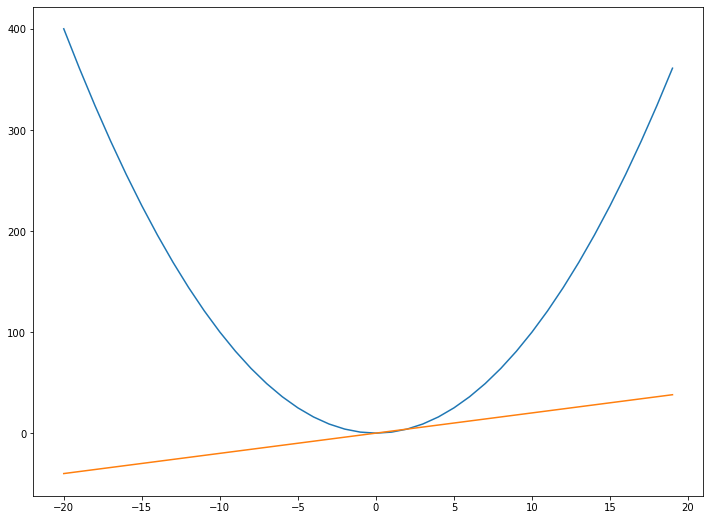

In [162]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
import matplotlib.pyplot as pl
x = 20
l = [x**2  for x in range(-x ,x,1)]
l2 = [2*x for x in range(-x,x,1)]
pl.plot(range(-x,x,1), l )
pl.plot(range(-x,x,1), l2 )



